# Fandango Movie Ratings

This analysis will determine whether or not Fandango's movie ratings continue to round upward and inflate the Fandango review compared to the actual rating of the film.

In [22]:
import pandas as pd

fan_before = pd.read_csv('fandango_score_comparison.csv')
fan_after = pd.read_csv('movie_ratings_16_17.csv')

In [23]:
# understand the columns and structure of data sets
fan_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [24]:
# display some rows for after the Fandango rating change
fan_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [25]:
# isolate only the Fandango columns for each data set
fan_cols_before = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fan_cols_after = ['movie', 'year', 'fandango']

fan_before = fan_before[fan_cols_before]
fan_after = fan_after[fan_cols_after]

In [26]:
# verify the new columns
fan_before.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')

In [27]:
fan_after.columns

Index(['movie', 'year', 'fandango'], dtype='object')

# Initial observations of data sets' samples

The data set being used for prior to Fandango's rating change contains samples that are categorized using the criteria from this quote (from the README file from the author's Github):

'...contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.'

The data set being used for after Fandango's rating change contains samples that are only the 214 films with the highest number of votes from 2016 and 2017.

This means that the samples from the data sets being used won't likely represent the entire population (which would be every movie Fandango has rated). In order not to arrive an incorrect conclusions, the goal of this analysis will change from understanding Fandango's reviews after their rating fix to comparing Fandango ratings for popular films from 2015, compare to popular films from 2016.

In [28]:
# determine if 'fan_after' data set has enough popular movies in sample to be representative of population
fan_after.shape

(214, 3)

In [29]:
# randomly sample 10 records from the 'fan_after' data set and view them online to see if they have at least 30 Fandango review
fan_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


9 of the 10 films listed above (all except for Cell) have at least 30 Fandango reviews. This sample should be sufficient to perform the analysis of the new goal of comparing Fandango ratings of popular movies between 2015 and 2016.

In [30]:
# isolate one of the data sets for the year 2016
fan_after = fan_after[fan_after['year'] == 2016]

In [49]:
# verify the data
fan_after['year'].value_counts()

2016    191
Name: year, dtype: int64

In [31]:
# determine which years the 'fan_before' data set contains
fan_before['year'] = fan_before['FILM'].str.extract(r'(\d\d\d\d)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [32]:
# verify the new year column
fan_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [33]:
# only include rows from the 'fan_before' data set that have movies from 2015
fan_before = fan_before[fan_before['year'] == '2015']

In [47]:
# verify the number of rows
fan_before['year'].value_counts()

2015    129
Name: year, dtype: int64

## Analyze newly filtered data

([<matplotlib.axis.XTick at 0x7f307a30be80>,
 <a list of 11 Text xticklabel objects>)

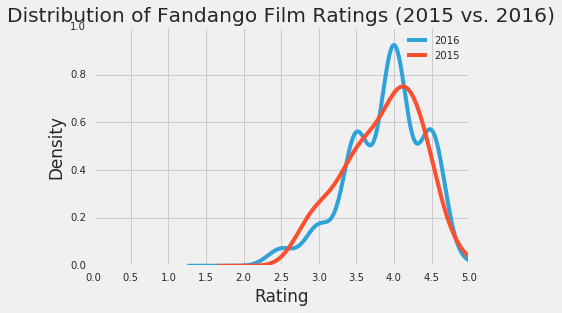

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt

# add style to the plots
plt.style.use('fivethirtyeight')

# generate kernel density plots to compare disributions
fan_after['fandango'].plot.kde(label='2016',legend=True)
fan_before['Fandango_Ratingvalue'].plot.kde(label='2015', legend=True)
plt.title('Distribution of Fandango Film Ratings (2015 vs. 2016)')
plt.xlabel('Rating')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

## Kernel Density Plot analysis

As seen in the KDE above, each distribution is left-skewed, which means we generally find higher ratings on the scale for both sets of data. The 2015 films appear to be slightly more left skewed than the 2016 data, but not by much. Based on the location of the peak of the distritbutions, it would seem that Fandango ratings were ever so slightly higher in 2015 than in 2016.

In [52]:
# generate frequency distribution tables
fan_before['Fandango_Ratingvalue'].value_counts().sort_index()

2.7     2
2.8     2
2.9     4
3.0     4
3.1     3
3.2     4
3.3     4
3.4     7
3.5     6
3.6     8
3.7     8
3.8     4
3.9    12
4.0     7
4.1    13
4.2    11
4.3     9
4.4     7
4.5     9
4.6     2
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [53]:
fan_after['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

Because the distributions have a different number of films, it would be more appropriate to analyze relative frequency as a percentage rather than the absolute frequency.

In [57]:
# generate frequency table with percentage
fan_before['Fandango_Ratingvalue'].value_counts(normalize=True).sort_index() * 100

2.7     1.550388
2.8     1.550388
2.9     3.100775
3.0     3.100775
3.1     2.325581
3.2     3.100775
3.3     3.100775
3.4     5.426357
3.5     4.651163
3.6     6.201550
3.7     6.201550
3.8     3.100775
3.9     9.302326
4.0     5.426357
4.1    10.077519
4.2     8.527132
4.3     6.976744
4.4     5.426357
4.5     6.976744
4.6     1.550388
4.8     2.325581
Name: Fandango_Ratingvalue, dtype: float64

In [58]:
fan_after['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [70]:
# compute summary statistics for each distribution
mean_after = round(fan_after['fandango'].mean(), 2)
median_after = round(fan_after['fandango'].median(), 2)
mode_after = round(fan_after['fandango'].mode()[0], 2)

mean_before = round(fan_before['Fandango_Ratingvalue'].mean(), 2)
median_before = round(fan_before['Fandango_Ratingvalue'].median(), 2)
mode_before = round(fan_before['Fandango_Ratingvalue'].mode()[0], 2)

# create new dataframe with a column for each year for the statistical values
summary_data = pd.DataFrame()

# create a row for each year in the data frame
summary_data['2015'] = [mean_before, median_before, mode_before]
summary_data['2016'] = [mean_after, median_after, mode_after]

# label the indexes
summary_data.index = ['mean', 'median', 'mode']

# verify the data
summary_data.head()

,2015,2016
mean,3.85,3.89
median,3.90,4.00
mode,4.10,4.00


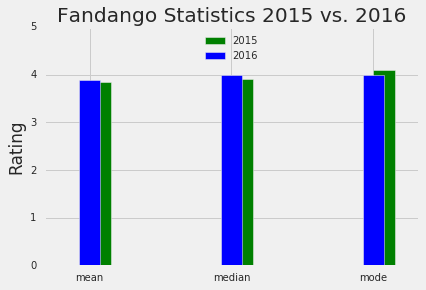

In [86]:
import seaborn as sns

# generate a grouped bar plot
summary_data['2015'].plot.bar(align='edge', width=0.15, label='2015', color='green', rot=0)
summary_data['2016'].plot.bar(align='center', width=0.15, label='2016', color='blue', rot=0)

# edit the chart's properties
plt.title('Fandango Statistics 2015 vs. 2016')
plt.legend(loc='upper center')
plt.ylim(0, 5)
plt.ylabel('Rating')

# Conclusion

As shown in the grouped bar plot above, the mean for Fandango average film review rating had actually increased from 2015 to 2016, despite what the conclusion was earlier in the analysis (based on distribution shape).